# Web scraping 1: one page

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime
from PIL import Image
# from urllib.parse import urljoin

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = bs(req.text, 'lxml')
print(f"Title: {soup.title.text}")
print(f"Subtitle: {soup.h2.text}")

Title: 
        Festival News
    
Subtitle: Chicago Weather Records, November 2017


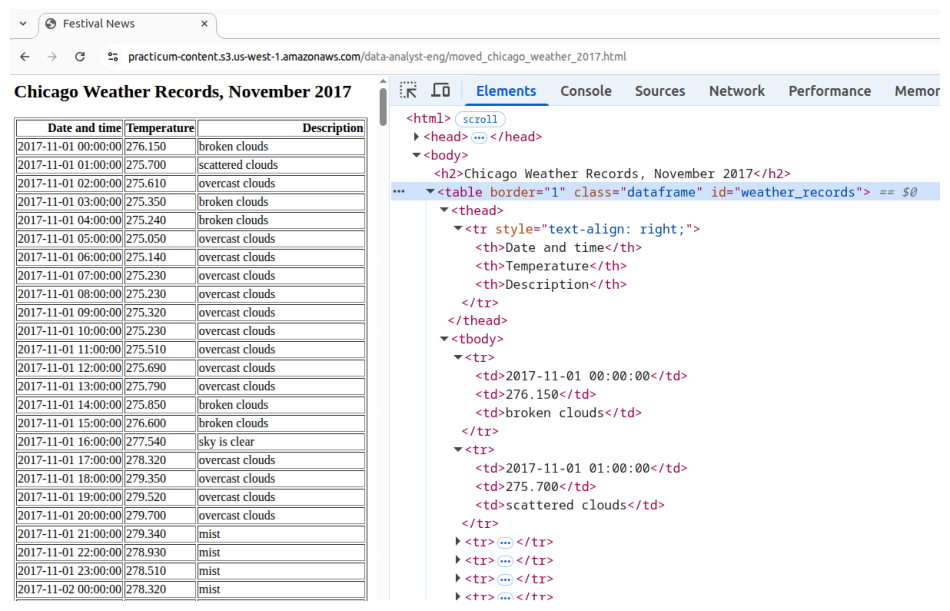

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../images/fest.png")

plt.figure(figsize=(12,10))  # width, height in inches
plt.imshow(img)
plt.axis("off")  # hide axes
plt.show()

In [3]:
tag = 'table'
id_tag = "weather_records"
table = soup.find(tag, attrs={"id": id_tag})

In [4]:
# Get column names from table
col_names = []
for row in table.find_all('th'):
    col_names.append(row.text)

# Get content from table
content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):      # Excluding headers
        content.append([i.text for i in row.find_all('td')])

In [5]:
weather_records = pd.DataFrame(data=content, columns=col_names)
print(weather_records.head(3))

file_name = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
weather_records.to_csv(f"../data/weather_records_{file_name}.csv", index=False, sep='\t')

         Date and time Temperature       Description
0  2017-11-01 00:00:00     276.150     broken clouds
1  2017-11-01 01:00:00     275.700  scattered clouds
2  2017-11-01 02:00:00     275.610   overcast clouds
